In [78]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 28.9 MB 3.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# read input data
rn = pd.read_csv('input/ReadsNumb_Oral.csv')
fs = pd.read_csv('input/reads_sizeL_oral__beforeClean.csv')
mrg = pd.merge(rn, fs, on='smpls_ID')
mrg.head(2)

,smpls_ID,reads_number,file_size
0,CRC001_S12,20905065,3470848
1,CRC002_S13,47102155,7853952


In [2]:
# read final input
mrg = pd.read_excel('input/ReadsNumb_Oral1.xlsx', sheet_name='ReadsNumb_Oral')
mrg.head(2)

,smpls_ID,Files_size,ReadsNumber,RN_host_removed,"RN_host_removed,%",RN_only_host,"RN_only_host,%",Adenoma_risk,N_polyps,Polyp_size_mm,Sample_type
0,CRC001_S12,3470848.0,20905065.0,1186263.0,0.056745,19423245.0,0.929117,High,5.0,14,Hyperplastic
1,CRC002_S13,7853952.0,47102155.0,1485580.0,0.031540,44966836.0,0.954666,High,2.0,20,High grade serous adenoma


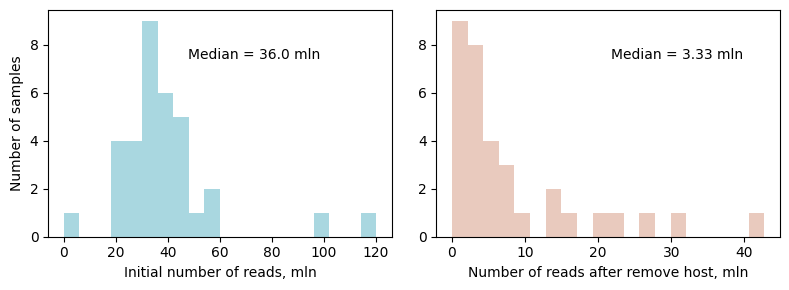

In [7]:
import matplotlib.pyplot as plt

# make a plot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
 
axs[0].hist(mrg['ReadsNumber']/1000000, bins=20, alpha=0.5, color='#55b0c2')
axs[0].set_xlabel('Initial number of reads, mln')
axs[0].set_ylabel('Number of samples')
#axs[0].set_title('Reads number per sample')
mn = mrg['ReadsNumber'].median()/1000000
axs[0].text(0.6, 0.8, 'Median = '+str(mn)[0:4]+' mln', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

axs[1].hist(mrg['RN_host_removed']/1000000, bins=20, alpha=0.5, color='#d4967f')
axs[1].set_xlabel('Number of reads after remove host, mln')
mn2 = mrg['RN_host_removed'].median()/1000000
#axs[1].set_title('Files size per sample')
axs[1].text(0.7, 0.8, 'Median = '+str(mn2)[0:4]+' mln', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

plt.tight_layout()
plt.savefig('results/Ststs1.png', dpi=300)

In [33]:
mrg['Adenoma_risk'].unique()

array(['High', 'Tumor_anomaly', 'Tumor', 'Healthy', 'Negative_control',
       nan], dtype=object)

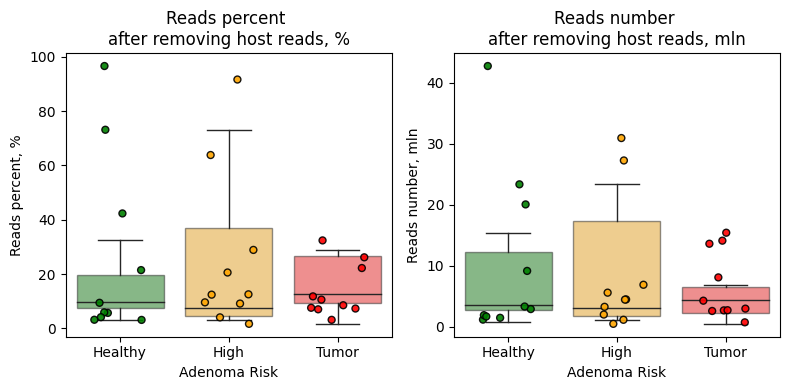

In [8]:
mrg1 = mrg[(mrg['Adenoma_risk'] != 'Tumor_anomaly') & (mrg['Adenoma_risk'] != 'Negative_control')]
order = ['Healthy', 'High', 'Tumor']
colors = ['green', 'orange', 'red']

# create a new column using assign method
mrg1 = mrg1.assign(rn_after=mrg1['RN_host_removed'] / 1000000)
mrg1 = mrg1.assign(rn_perc=mrg1['RN_host_removed,%'] * 100)

# make a plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(x='Adenoma_risk', y='rn_perc', data=mrg1, boxprops=dict(alpha=0.5), 
            showfliers=False, linewidth=1, order=order, palette=colors, ax=axs[0])
sns.stripplot(x='Adenoma_risk', y='rn_perc', hue='Adenoma_risk', data=mrg1,
              jitter=0.25, size=5, palette=colors, legend=False,
              linewidth=1, edgecolor='black', alpha=0.9, ax=axs[0])
axs[0].set_xlabel('Adenoma Risk')
axs[0].set_ylabel('Reads percent, %')
axs[0].set_title('Reads percent '+'\n'+'after removing host reads, %')

sns.boxplot(x='Adenoma_risk', y='rn_after', data=mrg1, boxprops=dict(alpha=0.5), 
            showfliers=False, linewidth=1, order=order, palette=colors, ax=axs[1])
sns.stripplot(x='Adenoma_risk', y='rn_after', hue='Adenoma_risk', data=mrg1,
              jitter=0.25, size=5, palette=colors, legend=False,
              linewidth=1, edgecolor='black', alpha=0.9, ax=axs[1])
axs[1].set_xlabel('Adenoma Risk')
axs[1].set_ylabel('Reads number, mln')
axs[1].set_title('Reads number '+'\n'+'after removing host reads, mln')

plt.tight_layout()
plt.savefig('results/Ststs3.png', dpi=300)

In [79]:
from scipy.stats import f_oneway
order = ['Healthy', 'High', 'Tumor']

In [88]:
# perform ANOVA test
f_stat, p_val = f_oneway(mrg1[mrg1['Adenoma_risk'] == 'Healthy']['RN_host_removed,%'], 
                         mrg1[mrg1['Adenoma_risk'] == 'High']['RN_host_removed,%'], 
                         mrg1[mrg1['Adenoma_risk'] == 'Tumor']['RN_host_removed,%'])

# print the results
#print('F-value:', f_stat)
#print('P-value:', p_val)

# add significance level to the boxplot
if p_val < 0.05:
    sig_level = '*'
else:
    sig_level = ' (ns)'

print(f'ANOVA Test\nP-value = {p_val:.4f}{sig_level}')


ANOVA Test
P-value = 0.4911 (ns)


In [93]:
mrg1['RN_host_removed,%'].min()

0.01648264957797275

In [94]:
mrg1['RN_host_removed,%'].max()

0.9662449400499216